In [21]:
import numpy as np
import matplotlib.pyplot as plt
import psana
import time

# Specify the parameters

In [25]:
experiment_line = 'amo'
user_name = 'haoyuan'

experiment_name = "amo86615"
run_number = 186
detector_name = "pnccdBack"

# Initialize the detector object

In [24]:
tic = time.time()

# Define the detector object
ds = psana.DataSource('exp={}:run={}:idx'.format(experiment_name, run_number))
run = ds.runs().next()    
times = run.times()
env = ds.env()
det = psana.Detector(detector_name, env)

# Get an example pattern
idx = 0
evt = run.event(times[idx])
example = det.image(evt)

# Get the shape of the example pattern
shape = example.shape

toc = time.time()
print('It takes {:.5} seconds to finishes the initialization.'.format(toc-tic))

It takes 2.3608 seconds to finishes the initialization.


# Show the mask

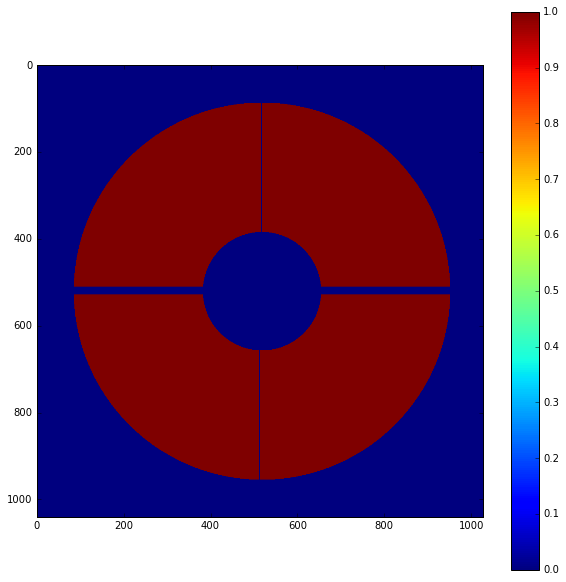

In [27]:
data = np.load('/reg/d/psdm/{}/{}/scratch/{}/psocake/r{:0>4d}/mask.npy'.format(experiment_line,
                                                                               experiment_name,
                                                                               user_name,
                                                                               run_number))
# Assemble the pattern
assembed_mask = det.image(evt=evt, nda_in=data)

# Show the pattern
plt.figure(figsize=(16, 12))
plt.imshow(assembed_mask)
plt.colorbar()
plt.show()


# Save the mask

In [28]:
save_address = '/reg/d/psdm/{}/{}/scratch/{}/psocake/r{:0>4d}/mask_2D.npy'.format(experiment_line,
                                                                               experiment_name,
                                                                               user_name,
                                                                               run_number)
np.save(save_address, assembed_mask)
print('The assembled mask is saved to the following address.')
print(save_address)

The assembled mask is saved to the following address.
/reg/d/psdm/amo/amo86615/scratch/haoyuan/psocake/r0186/mask_2D.npy
